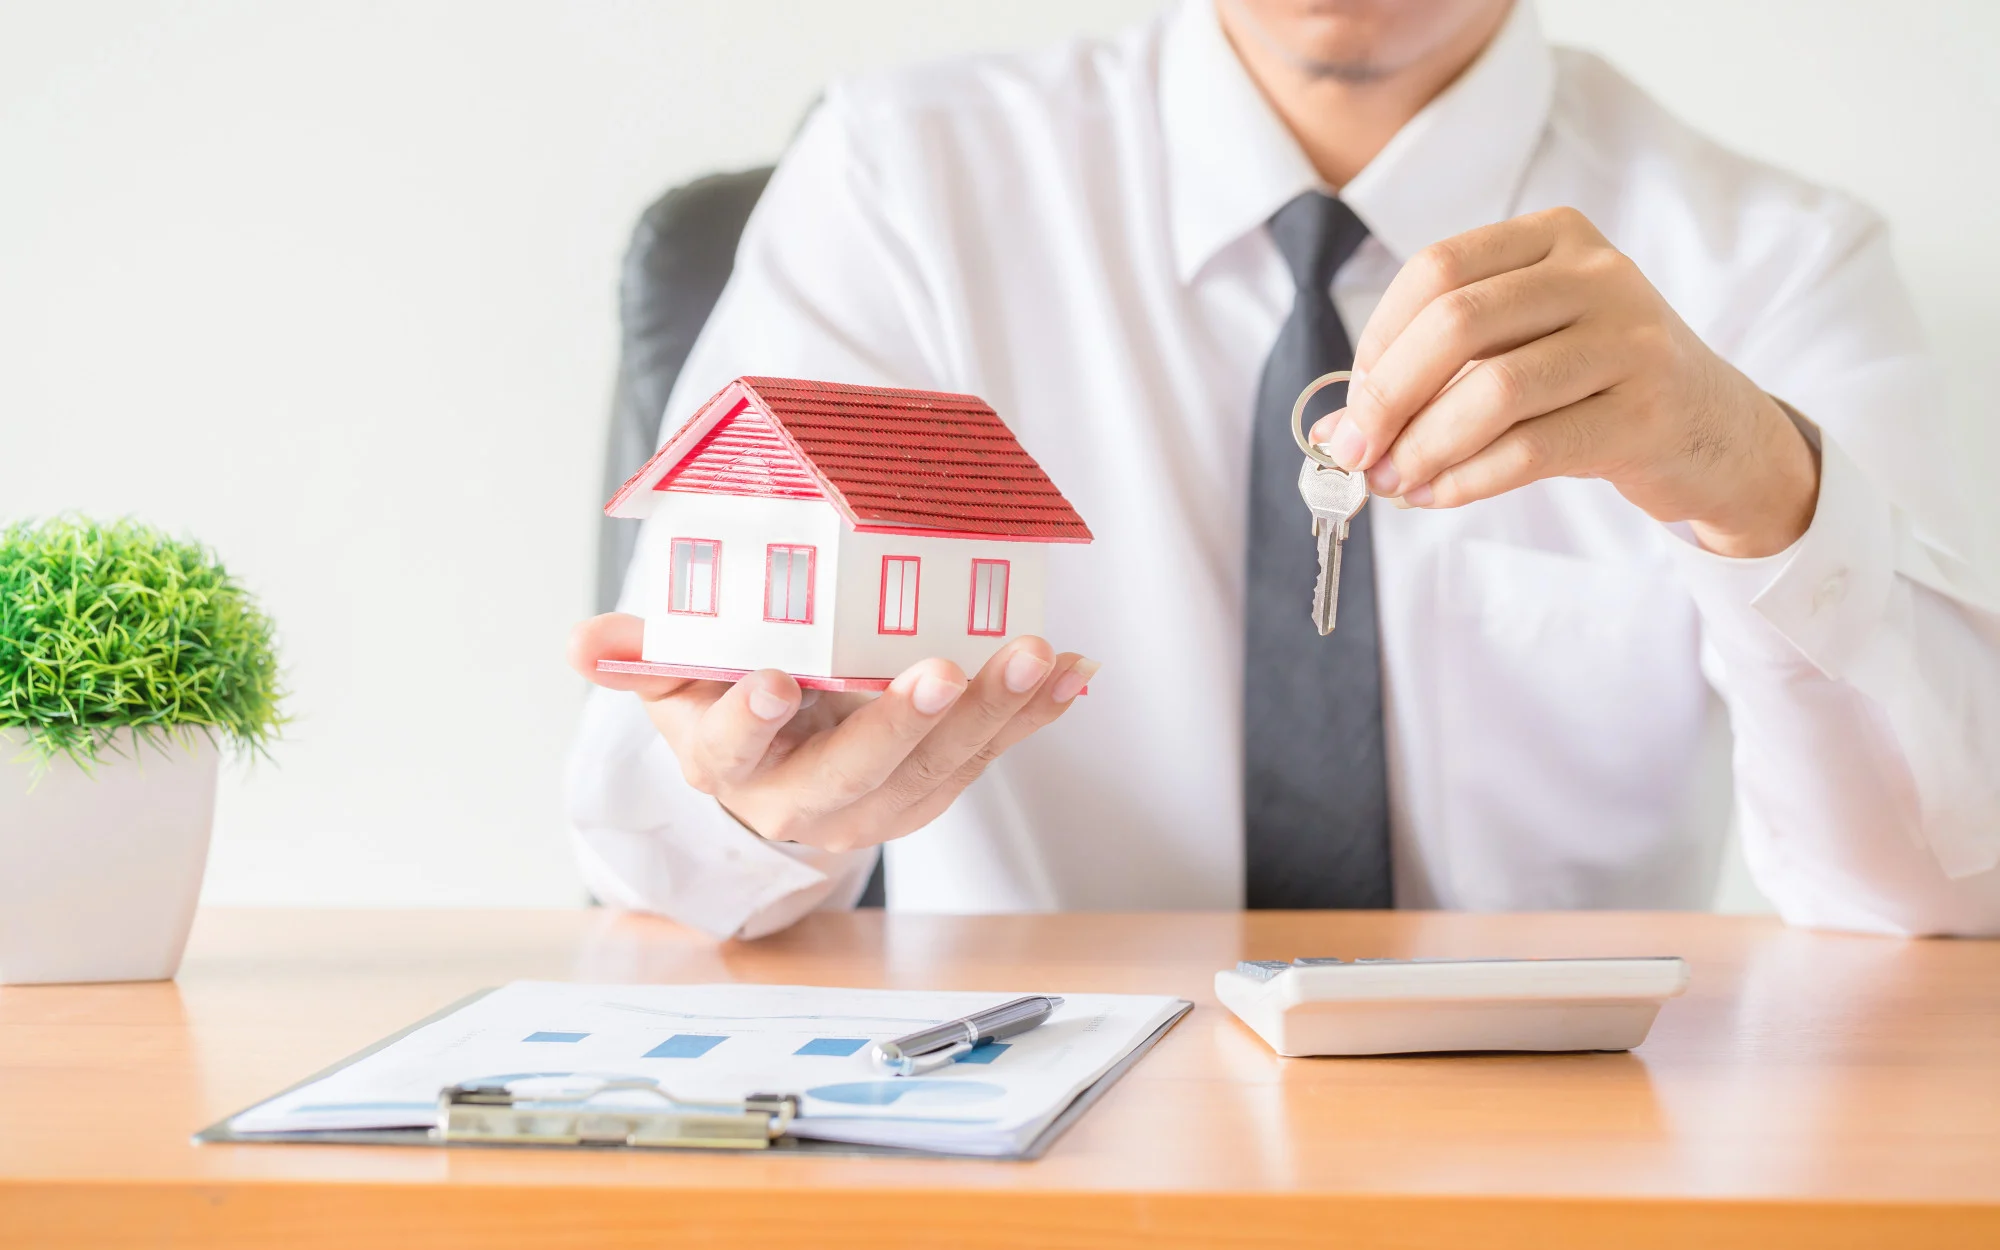

# "Predicting Loan Approval using Classification Algorithm"

Index:
1. Data Pre-processing

2. Exploratory Data Analysis

3. Feature Selection/Feature Engineering

4. Model Selection

5. Model training(base model)

6. Hypertunning(optimized model)
7. Ensemble method

8. Model Evaluation and comparing the best models(plot the performance of all models)
9. Bagging and Boosting
10. Plot the performance(random forest tree)

11. Interpretating the results and recommendations

## Executive Summary

### Business Problem: The business problem for this machine learning project is to develop an accurate model that can predict whether a loan applicant will be approved for a loan based on their financial records and other relevant information. This will help the lending institution streamline their loan approval process, reduce the risk of default, and improve overall efficiency.

### Business Context: Lending institutions face the challenge of efficiently processing a large volume of loan applications while also ensuring that the loans they approve are low-risk. By utilizing machine learning models to automate the loan approval process, they can make quicker and more informed decisions, leading to increased customer satisfaction and reduced operational costs.

### Constraints:

### Data Quality: The accuracy and completeness of the dataset used for training the machine learning model are crucial for producing reliable predictions. Any missing or incorrect data could negatively impact the model's performance.
### Regulatory Compliance: The model must comply with regulatory requirements such as fair lending practices and data privacy laws to ensure that loan decisions are made fairly and ethically.
### Interpretability: The model's predictions should be interpretable and transparent to stakeholders, so they can understand the reasons behind a loan approval or rejection.
### Model Bias: The model should be trained on a diverse and representative dataset to minimize biases that could result in discriminatory practices. Fairness and impartiality should be prioritized in the model's development.
### Performance Metrics: The model's performance should be evaluated using appropriate metrics such as accuracy, precision, recall, and ROC-AUC score to ensure its effectiveness in predicting loan approval outcomes.

In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
import xgboost as xgb
from xgboost import XGBClassifier

### Data Exploration and Pre-processing

In [59]:
#read dataset
data=pd.read_csv('loan_approval_dataset.csv')

In [60]:
#data with 5 obs
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [61]:
#removing extra space from the dataset varibles
data.columns = [col[1:] for col in data.columns] # to remove the extra in the beginning of each feature
data.columns

Index(['oan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [62]:
#drop unnecessary varible
data.drop('oan_id',axis=1, inplace=True)

In [63]:
data=pd.DataFrame(data)

In [64]:
data.rename(columns={'cibil_score': 'credit_score'}, inplace=True)

In [65]:
data.shape

(4269, 12)

In [66]:
#find null values
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
credit_score                0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

No null values present in the dataset

In [67]:
#Display information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   credit_score              4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [68]:
#find duplicates
data.duplicated().sum()

0

No duplicate values in the dataset

In [69]:
#descriptive statisitcs
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### The statistics suggest that the majority of loan applicants have moderate to high incomes, with a significant variability in asset values and credit scores.

In [70]:
# Define the columns you want to check for outliers
columns = ['income_annum', 'loan_amount','residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
data = pd.DataFrame(data)
outliers_sum = {}
def detect_outliers(column):
    Q1 = column.quantile(0.10)
    Q3 = column.quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3* IQR
    upper_bound = Q3 + 3* IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers
for column in columns:
    outliers = detect_outliers(data[column])
    outliers_sum[column] = outliers.sum()

print(outliers_sum)

{'income_annum': 0, 'loan_amount': 0, 'residential_assets_value': 0, 'commercial_assets_value': 0, 'luxury_assets_value': 0, 'bank_asset_value': 0}


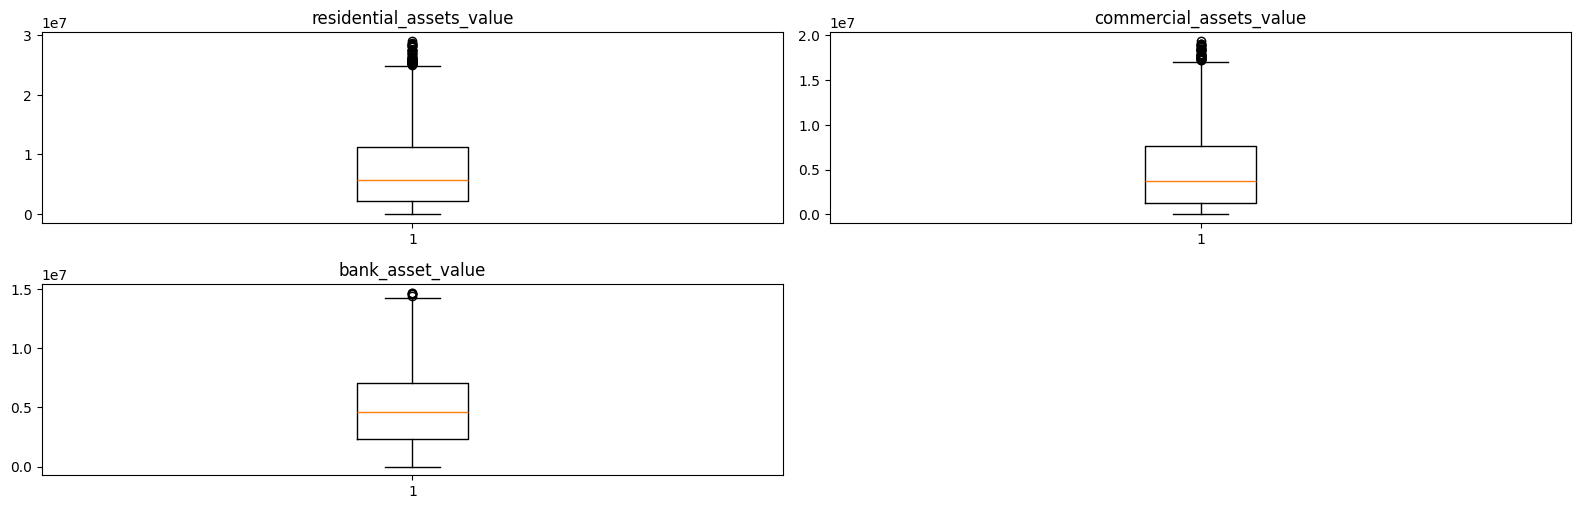

In [71]:
numerical_columns = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns): 
    plt.subplot(4, 2, i+1) 
    plt.boxplot(data[col]) 
    plt.title(col)
    plt.tight_layout() 

plt.show()

Possible outliers can be seen in these 3 variables which will be removed for better performance of the model

In [72]:
#remove outliers
def remove_outliers(data):
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        data = data[(z_scores < 2.5)]
    return data

# Remove outliers in the DataFrame
data = remove_outliers(data)

print(data)

      no_of_dependents      education self_employed  income_annum  \
1                    0   Not Graduate           Yes       4100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
5                    0       Graduate           Yes       4800000   
6                    5       Graduate            No       8700000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  credit_score  residential_assets_value  \
1        12200000          8           417                   2700000   
3        30700000          

In [73]:
#no of obs after removal of outliers
data.shape

(4006, 12)

Approximately 6% outliers have been removed 

## Exploratory Data Analysis

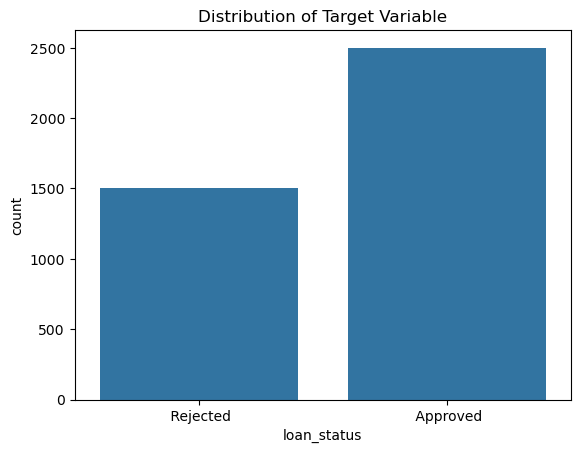

In [17]:
#explore target variable
sns.countplot(x='loan_status', data=data) 
plt.title('Distribution of Target Variable') 
plt.show()

In [18]:
#value counts of target var
data['loan_status'].value_counts()

loan_status
 Approved    2501
 Rejected    1505
Name: count, dtype: int64

### Approximately  37.5% of the total loans have a loan_status rejected. This is an minor imbalanced data set

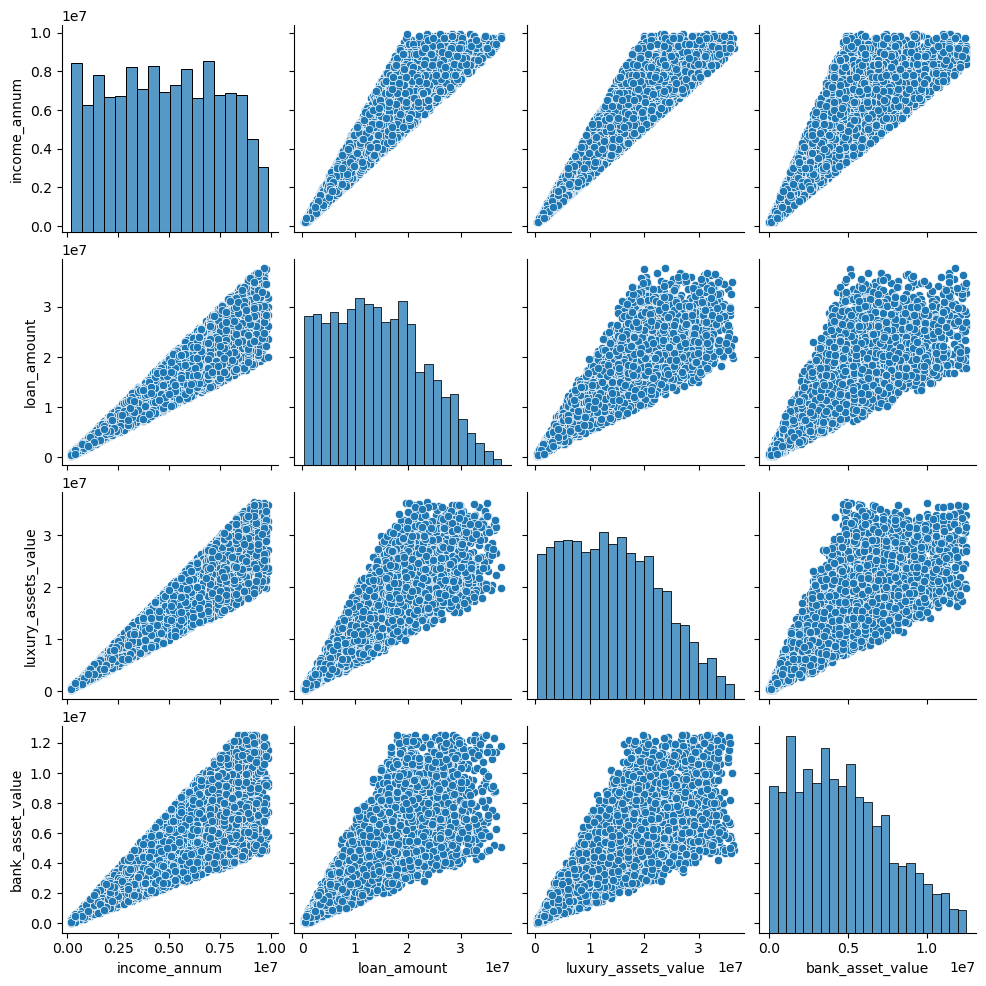

In [19]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['income_annum', 'loan_amount', 'luxury_assets_value', 'bank_asset_value']])
plt.show()

Income, Loan amount, luxury assets and bank asset value has positive linear relationsips amongst eachother 

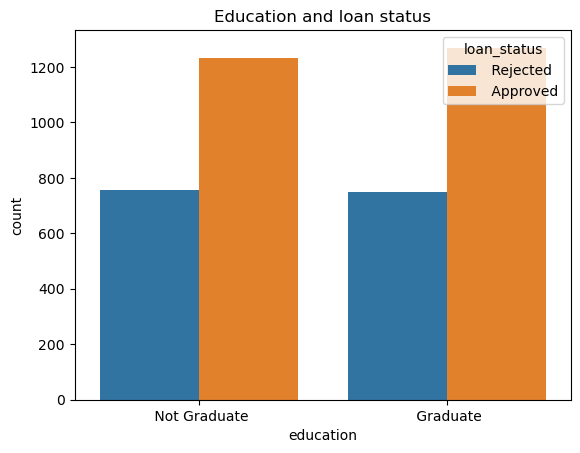

In [20]:
# Barplot to compare loan status based on education
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Education and loan status')
plt.show()

According to the graph,number of graduates applicants are higher in terms of loan aplications. number of loan approval rates are slightly higher for graduates than non-graduates

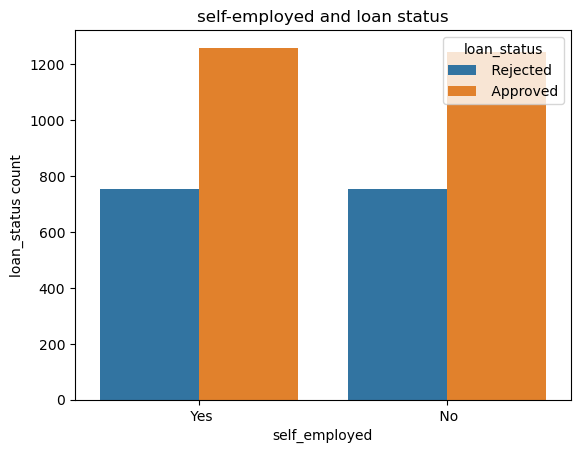

In [21]:
#barplot to compare self employment and loan approval
sns.countplot(x='self_employed', hue='loan_status', data=data)
plt.title('self-employed and loan status')
plt.ylabel('loan_status count')
plt.show()

According to the bar graph, self employed individuals were rejected more than the non self employed. number of applications for self employed were slightly lower compared to non self-employed

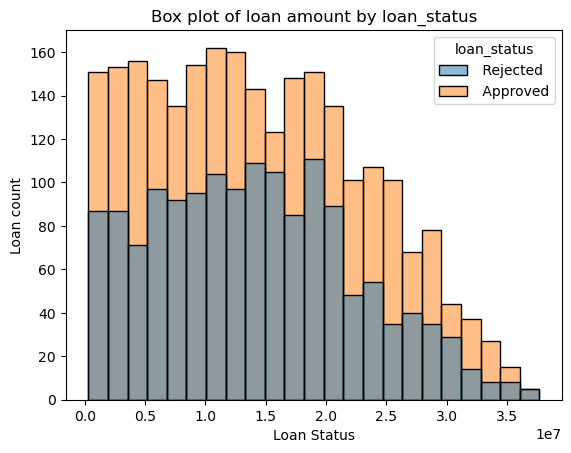

In [22]:
#histogram for loan amount and loan status
sns.histplot(data, x='loan_amount', hue='loan_status')
plt.title('Box plot of loan amount by loan_status') 
plt.xlabel('Loan Status') 
plt.ylabel('Loan count') 
plt.show()

According to the plot we cannot see strong relationship between loan status and loan amount. both approved and rejected loans have similar trends

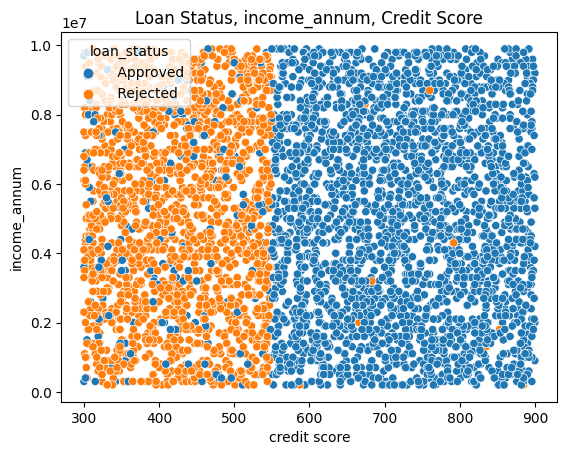

In [16]:
#scatter plot to see how income is related to credit score which decides on loan status
sns.scatterplot(x='credit_score', y= 'income_annum', hue='loan_status',data=data)
plt.title("Loan Status, income_annum, Credit Score")
plt.xlabel("credit score")
plt.ylabel("income_annum")
plt.show()

Clear seperation is seen of approved and rejection at the credit score of 550. income is highly related to credit score. we can see some with poor credit score were still approved for the loan whereas very few with higher credit score more than 700 were till rejected loan.

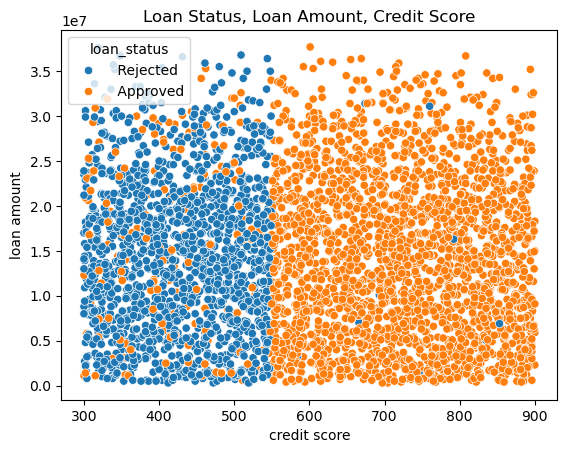

In [24]:
#scatter plot to see how loan amount is related to credit score which decides on loan status
sns.scatterplot(x='credit_score', y= 'loan_amount', hue='loan_status',data=data)
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("credit score")
plt.ylabel("loan amount")
plt.show()

Clearly seperation can be seen of approved and rejection at the credit score of 550. many of them with poor credit score were still approved the loan whereas very few with higher credit score were rejected for the loan. small amount of loan is been applied by many of them and less people have applied for high amount of loan

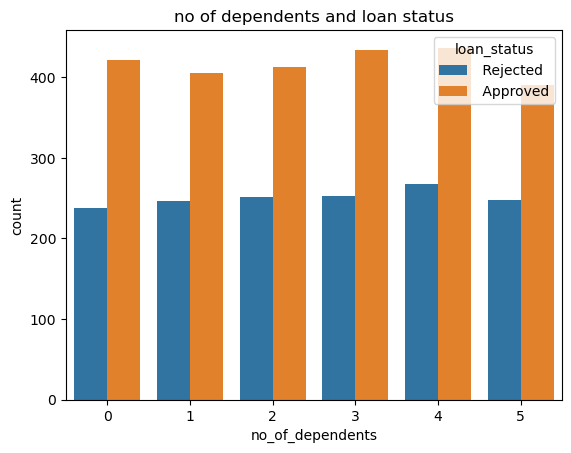

In [25]:
#barplot for dependents and loan status
sns.countplot(x='no_of_dependents', hue='loan_status', data=data)
plt.title('no of dependents and loan status')
plt.show()

According to the graph number of dependents increase the rejection of loan also increases but for 5 dependents the rejection is not high

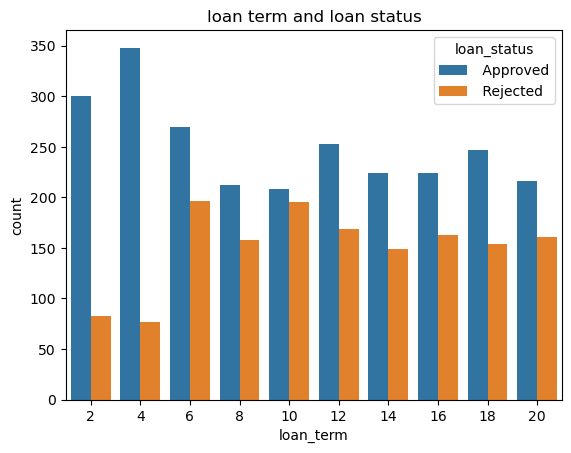

In [26]:
#count the loan term with loan status
sns.countplot(x='loan_term',hue='loan_status', data=data) 
plt.title('loan term and loan status') 
plt.show()

Shorter loan term has highest approval rate and lower rejection rate and longer term has higher rejection rate and les approval rate

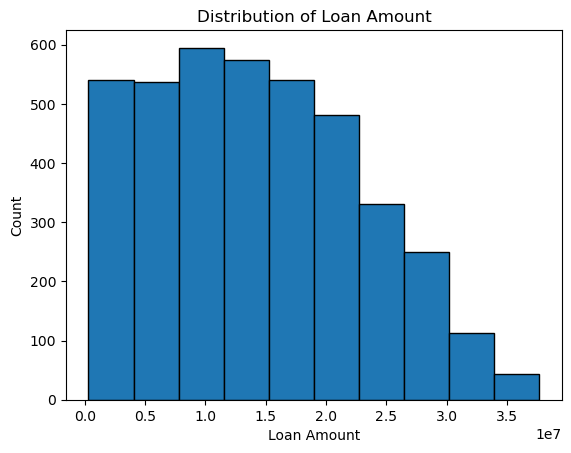

In [27]:
#check distribution of loan amount
plt.hist(data['loan_amount'], bins=10, edgecolor='black') 
plt.xlabel('Loan Amount')
plt.ylabel('Count') 
plt.title('Distribution of Loan Amount') 
plt.show()

There are high number of people applied for the loan of shorter amount. Amount of 75 k to 1.25 k has the highest amount of application. Gradually, from 1.95 K the loan amount is decreasing and very few people are applying for higher amount of loan

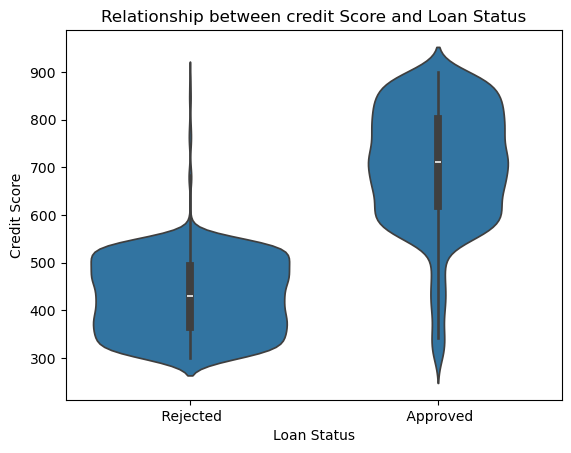

In [28]:
#check credit score
sns.violinplot(x='loan_status', y='credit_score', data=data)
plt.xlabel('Loan Status') 
plt.ylabel('Credit Score')
plt.title('Relationship between credit Score and Loan Status') 
plt.show()

Approval rate is higher for credit score ranging from 630 to 800 whereas rejection rate is slightly more for credit score ranging from 370 to 490

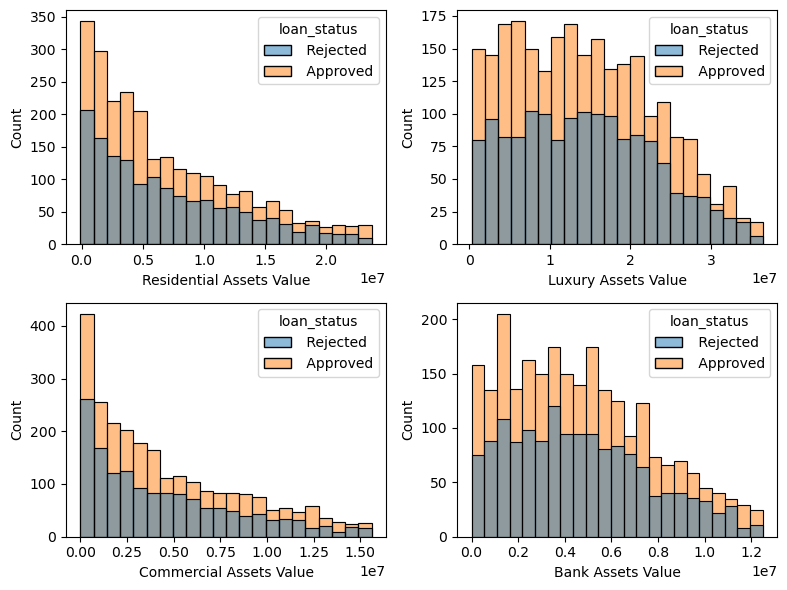

In [29]:
#check loan status with bank assets
fig,axes = plt.subplots(2, 2, figsize = (8, 6))
sns.histplot(data, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

#check loan status with commerical assets
sns.histplot(data, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

#check loan status with luxury assets
sns.histplot(data, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

#check loan status with residential assets
sns.histplot(data, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

plt.tight_layout()
plt.show()

Luxury assets: Properties or items considered to be of high value and quality, such as high-end real estate, luxury vehicles, and expensive jewelry. These assets can serve as collateral for a loan and may positively impact the applicant's creditworthiness.

Commercial assets: Assets related to a business, such as commercial real estate, equipment, or inventory. These assets can be considered when evaluating a business loan application and assessing the applicant's ability to repay the loan.

Bank assets: Assets held in bank accounts, such as savings and checking accounts, CDs, and other investments. These assets can demonstrate the applicant's financial stability and ability to make regular loan payments.

Residential assets: Assets related to a personal residence, such as a primary home or investment property. These assets can be considered when evaluating a mortgage or home equity loan application and assessing the applicant's ability to meet the loan require

According to the graph, as these assets increases the amount of loan and chances of approval also increases. ments.

##  Data Pre-Processing

Now, Labelencoding will be done to convert categorical variables into numeric binary variables

In [74]:
data=pd.DataFrame(data)

In [75]:
#label encode the categorical variables
le = LabelEncoder()
# Apply LabelEncoder to categorical variables
data['education'] = le.fit_transform(data['education'])
data['self_employed'] = le.fit_transform(data['self_employed']) 
data['loan_status'] = le.fit_transform(data['loan_status'])

In [76]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
5,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1
6,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'no_of_dependents'),
  Text(0, 1.5, 'education'),
  Text(0, 2.5, 'self_employed'),
  Text(0, 3.5, 'income_annum'),
  Text(0, 4.5, 'loan_amount'),
  Text(0, 5.5, 'loan_term'),
  Text(0, 6.5, 'credit_score'),
  Text(0, 7.5, 'residential_assets_value'),
  Text(0, 8.5, 'commercial_assets_value'),
  Text(0, 9.5, 'luxury_assets_value'),
  Text(0, 10.5, 'bank_asset_value'),
  Text(0, 11.5, 'loan_status')])

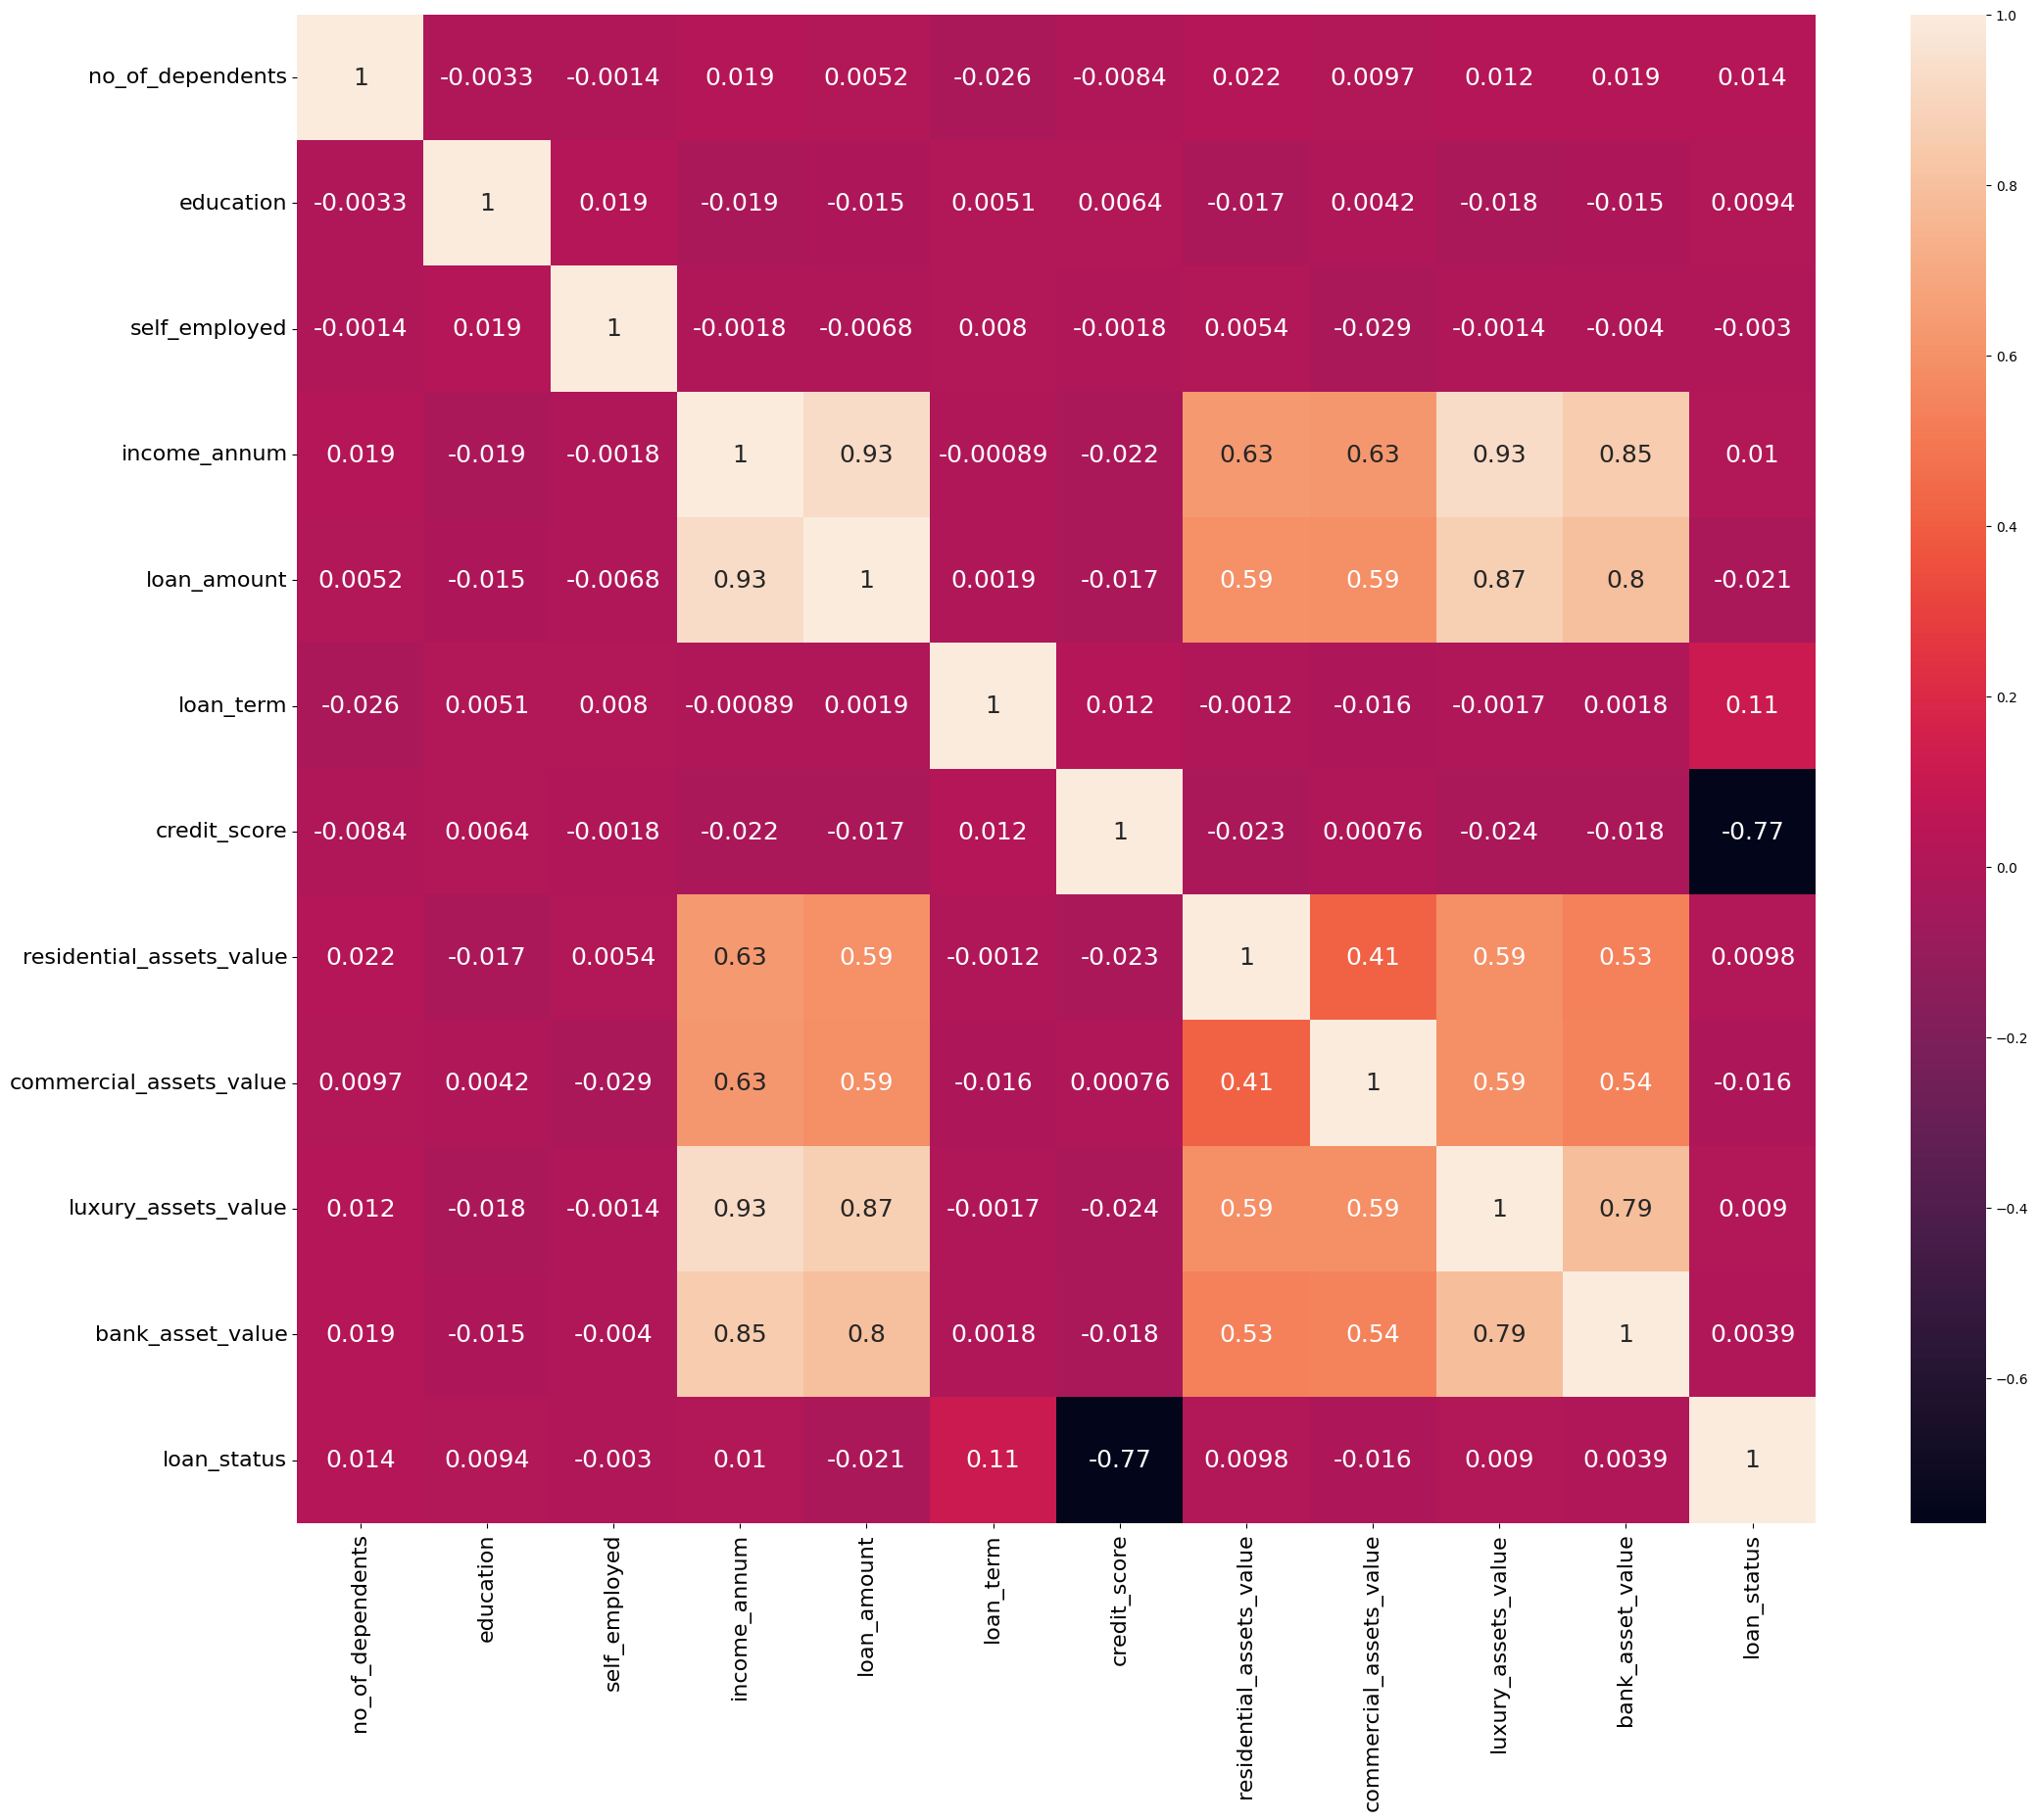

In [20]:
#check correlation of variables
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 18})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Credit Score: Credit score has a significant negative correlation with loan approval status. This implies that a higher Credit score is associated with a higher likelihood of loan approval.

Income Annually: Income annually has a positive correlation with loan approval status. This suggests that individuals with higher income levels are more likely to get their loans approved.

Bank Asset Value: Bank asset value also shows a positive correlation with loan approval status. This indicates that individuals with higher bank asset values may have a greater chance of loan approval.

Residential Assets Value: Residential assets value has a positive correlation with loan approval status. This suggests that individuals with higher residential assets values may be more likely to have their loans approved.

Loan Amount: The loan amount has a positive correlation with income annually and bank asset value. It may be important to consider the loan amount in relation to the individual's financial capabilities and assets when determining loan approval.

In [34]:
from scipy.stats import shapiro

# Assuming df is your dataset with input variables
for column in data.columns:
    stat, p = shapiro(data[column])
    alpha = 0.05
    if p > alpha:
        print(f'{column} is normally distributed (fail to reject H0)')
    else:
        print(f'{column} is not normally distributed (reject H0)')

no_of_dependents is not normally distributed (reject H0)
education is not normally distributed (reject H0)
self_employed is not normally distributed (reject H0)
income_annum is not normally distributed (reject H0)
loan_amount is not normally distributed (reject H0)
loan_term is not normally distributed (reject H0)
credit_score is not normally distributed (reject H0)
residential_assets_value is not normally distributed (reject H0)
commercial_assets_value is not normally distributed (reject H0)
luxury_assets_value is not normally distributed (reject H0)
bank_asset_value is not normally distributed (reject H0)
loan_status is not normally distributed (reject H0)


### As the data is not normally distributed, further steps would be to normalize and scale the data

In [77]:
#Splitting the data into features (X) and target variable (y)
X = data.drop('loan_status',axis=1)
y = data['loan_status']

### Scaling and normalization

In [78]:
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'credit_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

In [79]:
#Standardize the features using StandardScaler
sc = StandardScaler()
X[numerical_columns] = sc.fit_transform(X[numerical_columns])

In [80]:
print(X)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
1            -1.480902          1              1     -0.254813    -0.245274   
3             0.289639          0              0      1.282962     1.909683   
4             1.470000          1              1      1.883069     1.152536   
5            -1.480902          0              1      0.007734    -0.093844   
6             1.470000          0              0      1.470495     2.177597   
...                ...        ...            ...           ...          ...   
4264          1.470000          0              1     -1.417522    -1.398467   
4265         -1.480902          1              1     -0.554867    -0.350110   
4266         -0.300541          1              0      0.645348     1.117591   
4267         -0.890721          1              0     -0.254813    -0.175383   
4268         -0.890721          0              0      1.658029     1.793199   

      loan_term  credit_score  residential_assets_v

In [81]:
X=pd.DataFrame(X)

### Selecting best features for the model

In [82]:
#Principal Component Analysis (PCA) is being applied to reduce the dimensionality
pca = PCA(n_components=11)
#Transforming the original dataset X using PCA
X = pca.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.140221,-0.189336,-1.375291,1.289758,0.078364,0.407776,0.704269,0.000177,0.071931,0.281565,0.208565
1,2.902103,0.797895,-0.538319,0.058313,-1.560019,0.283871,-0.708936,-0.081959,0.211499,0.611787,-0.152054
2,2.846651,0.344934,-1.006479,-2.240012,0.077216,-0.152422,0.725470,0.125200,1.170327,-0.361944,0.470825
3,0.313325,-0.193425,-1.922940,1.033599,0.673504,-0.585546,0.002803,0.711411,-0.323144,-0.013454,0.020410
4,4.132461,1.527636,1.243181,-0.063149,-0.148590,-2.099804,-0.667436,0.163578,1.383533,0.394727,-0.293975


In [83]:
#calculate the explained variance ratio of the principal components obtained from PCA
explained_variance_ratio = pca.explained_variance_ratio_
#calculate the cumulative explained variance of the principal components
cumulative_variance = np.cumsum(explained_variance_ratio)

In [84]:
 # Create a DataFrame
data = {'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
        'Explained Variance Ratio': explained_variance_ratio,
        'Cumulative Variance Ratio': cumulative_variance}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                  PC1                  0.471671                   0.471671
1                  PC2                  0.108592                   0.580263
2                  PC3                  0.104687                   0.684950
3                  PC4                  0.102610                   0.787560
4                  PC5                  0.061804                   0.849364
5                  PC6                  0.054725                   0.904089
6                  PC7                  0.026788                   0.930876
7                  PC8                  0.025763                   0.956640
8                  PC9                  0.024823                   0.981463
9                 PC10                  0.014035                   0.995498
10                PC11                  0.004502                   1.000000


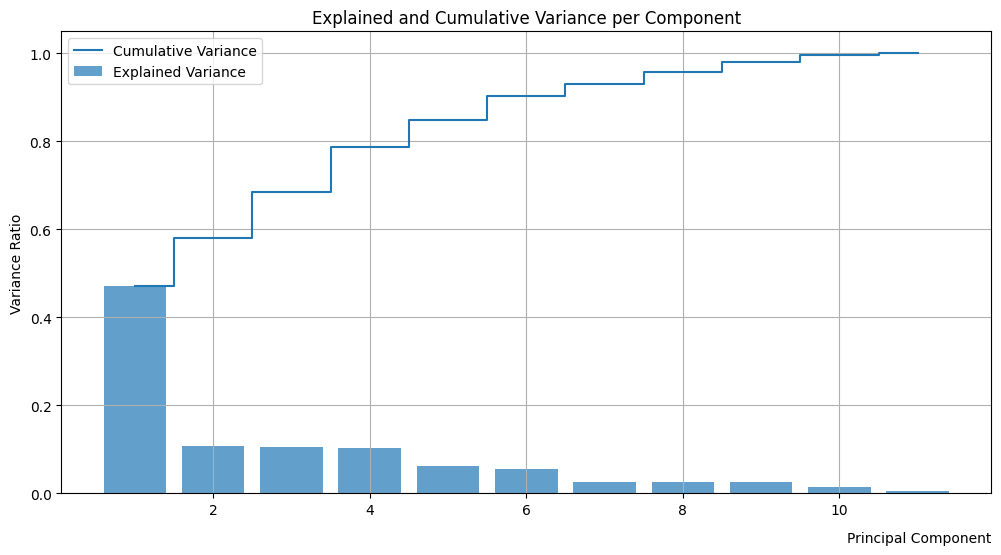

In [164]:
#plot the explained and cumulative variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Explained Variance') 
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.xlabel('Principal Component', labelpad=10, loc='right', position=(1.0, 0))
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Variance per Component')
plt.legend() 
plt.grid()
plt.show()

In [86]:
# Sort the explained variance ratios in decreasing order
sorted_explained_variance_ratio = np.sort(explained_variance_ratio)[::-1]

# Calculate the cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(sorted_explained_variance_ratio)

In [87]:
# Determine the number of components to retain based on a threshold (e.g., 95% cumulative variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
#print the no of components
print(f"Number of principal components to retain for 95% cumulative variance: {num_components}")

Number of principal components to retain for 95% cumulative variance: 8


In [88]:
# Use the selected number of principal components to reconstruct the original features
selected_pca = PCA(n_components=num_components)
X = selected_pca.fit_transform(X)

In [89]:
X=pd.DataFrame(X)

In [90]:
X

,0,1,2,3,4,5,6,7
0,-1.140221,-0.189336,-1.375291,1.289758,0.078364,0.407776,0.704269,0.000177
1,2.902103,0.797895,-0.538319,0.058313,-1.560019,0.283871,-0.708936,-0.081959
2,2.846651,0.344934,-1.006479,-2.240012,0.077216,-0.152422,0.725470,0.125200
3,0.313325,-0.193425,-1.922940,1.033599,0.673504,-0.585546,0.002803,0.711411
4,4.132461,1.527636,1.243181,-0.063149,-0.148590,-2.099804,-0.667436,0.163578
...,...,...,...,...,...,...,...,...
4001,-2.911343,1.502747,-1.082994,-1.320485,-0.156448,-0.188801,-0.015501,0.694663
4002,-1.274001,-1.895885,-1.090134,-0.144004,0.030379,-0.073866,0.694119,0.051127
4003,1.696970,-0.739215,-1.050271,-0.658860,2.175277,0.024716,0.027453,-0.653003
4004,-0.321618,-0.646245,0.727429,1.016676,-0.873932,0.515840,-0.004554,-0.788064


PCA selected the best 8 features for model building and analysis.Now the columns will be renamed to the original variables

In [91]:
X = X.rename(index=str, columns={0: 'no_of_dependents', 1: 'education', 2: 'self_employed', 3: 'income_annum', 4: 'loan_amount', 5: 'loan_term', 6: 'credit_score',7:'residential_assets_value'})
print(X)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0            -1.140221  -0.189336      -1.375291      1.289758     0.078364   
1             2.902103   0.797895      -0.538319      0.058313    -1.560019   
2             2.846651   0.344934      -1.006479     -2.240012     0.077216   
3             0.313325  -0.193425      -1.922940      1.033599     0.673504   
4             4.132461   1.527636       1.243181     -0.063149    -0.148590   
...                ...        ...            ...           ...          ...   
4001         -2.911343   1.502747      -1.082994     -1.320485    -0.156448   
4002         -1.274001  -1.895885      -1.090134     -0.144004     0.030379   
4003          1.696970  -0.739215      -1.050271     -0.658860     2.175277   
4004         -0.321618  -0.646245       0.727429      1.016676    -0.873932   
4005          4.905747  -0.533164      -0.187981      0.761134    -0.032717   

      loan_term  credit_score  residential_assets_v

#### Split the dataset into train and test for model building. So, 30% of the dataset will be selected for the test set

In [92]:
#Split the data into training and testing sets with 30% of the data for testing
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state = 42,stratify=y)

# Model Selection

### K nearest neighbors

In [93]:
#initialize the empty list
acc=[] 
#Iterating over a range 
for i in range(1,10):
# creating a KNeighborsClassifier object knn with the number of neighbors set to the current value of i
    knn = KNeighborsClassifier(n_neighbors=i) 
#Fitting the knn object on the training data
    knn.fit(X_train, y_train) 
#predict the target values on the test data    
    predictions_knn = knn.predict(X_test) 
#appending the accuracy score to the list acc.    
    acc.append(accuracy_score(y_test,predictions_knn)) 
#printing the accuracy score for each value of k
    print("For k = ",i," : ",accuracy_score(y_test,predictions_knn))

For k =  1  :  0.8685524126455907
For k =  2  :  0.8643926788685524
For k =  3  :  0.8901830282861897
For k =  4  :  0.8943427620632279
For k =  5  :  0.9059900166389351
For k =  6  :  0.8993344425956739
For k =  7  :  0.9026622296173045
For k =  8  :  0.8960066555740432
For k =  9  :  0.9059900166389351


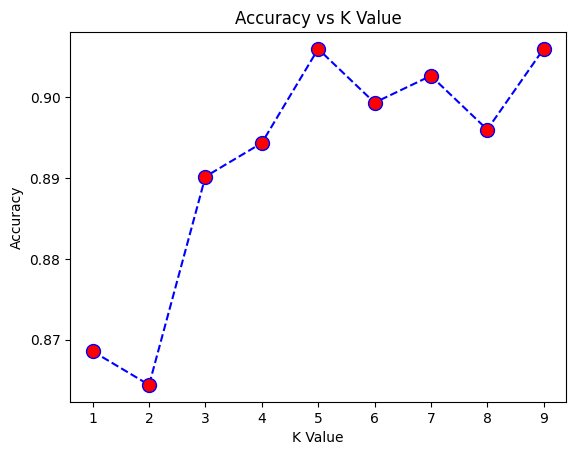

In [94]:
#Plotting the accuracy vs K values
plt.plot(range(1,10), acc, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10) 
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [193]:
# Specify the number of neighbors to find
k = 5

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn = knn.predict(X_test)

# Evaluate the classification report of the classifier
print( classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       750
           1       0.88      0.87      0.87       452

    accuracy                           0.91      1202
   macro avg       0.90      0.90      0.90      1202
weighted avg       0.91      0.91      0.91      1202



In [96]:
ypred_knn_train = knn.predict(X_train)

In [97]:
cm_tr=confusion_matrix(y_train, ypred_knn_train)
print(cm_tr)

[[1665   86]
 [  82  971]]


Base model shows an accuracy of 0.91,means that the model correctly predicts the outcome of the loan application 91% of the time.

### Support vector machine

In [198]:
#initialize the support vector model
svm = SVC()
#fit the model
svm.fit(X_train,y_train)

SVC()

In [199]:
#predict the target variable
yhat = svm.predict(X_test)
# Calculating the classification report of the model
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       750
           1       0.89      0.92      0.90       452

    accuracy                           0.93      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.93      0.93      0.93      1202



Base model shows an accuracy of 0.93,means that the model correctly predicts the outcome of the loan application 93% of the time.

In [190]:
#comfusion matrix on train set
ypred_svm_train = svm.predict(X_train)
print(classification_report(y_train,ypred_svm_train))
print('Accuracy Score:',accuracy_score(y_train,ypred_svm_train))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1751
           1       0.88      0.98      0.93      1053

    accuracy                           0.94      2804
   macro avg       0.93      0.95      0.94      2804
weighted avg       0.95      0.94      0.94      2804

Accuracy Score: 0.9425820256776034


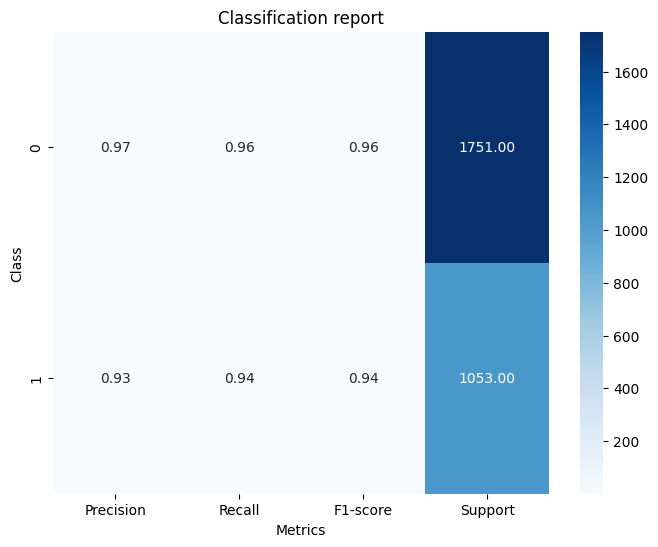

In [175]:
data = np.array([[0.97, 0.96, 0.96, 1751],
                 [0.93, 0.94, 0.94, 1053]])

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

Base model shows an accuracy on trains set of 0.94,means that the model correctly predicts the outcome of the loan application 94% of the time.

In [101]:
cm_trn=confusion_matrix(y_train, ypred_svm_train)
print(cm_trn)

[[1674   77]
 [  60  993]]


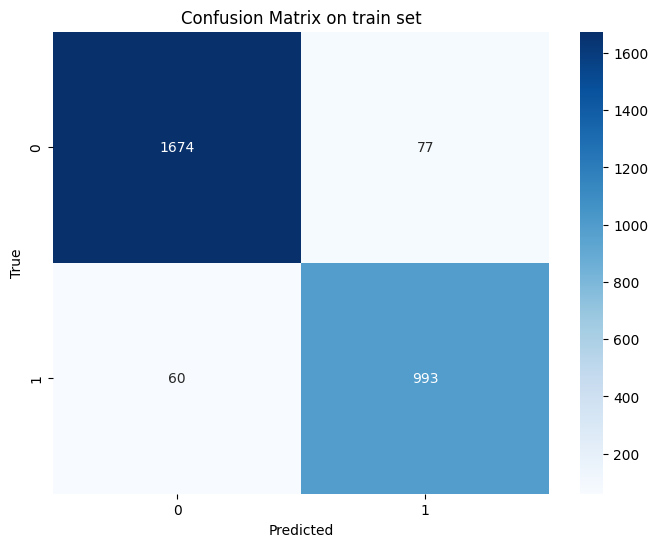

In [102]:
#plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_trn, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix on train set') 
plt.show()

In the context of loan approval, the confusion matrix provided shows the results of a classification model that predicts whether a loan application will be approved or denied.

True positive (TP): 993 loan applications were correctly predicted to be approved.
False positive (FP): 77 loan applications were incorrectly predicted to be approved (Type I error).
True negative (TN): 1674 loan applications were correctly predicted to be denied.
False negative (FN): 60 loan applications were incorrectly predicted to be denied (Type II error).
In this case, the model accurately predicted the approval of 993 loan applications and the denial of 1674 loan applications. However, it incorrectly approved 77 loan applications and denied 60 loan applications.

It is important to investigate the false positive and false negative results to understand why they occurred and potentially improve the model's performance. Reducing false positives can help prevent approving risky loans, while reducing false negatives can prevent denying potentially good applicants.

### Random Forest

In [196]:
#initialize the random forest model
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=3)
#fit the model
clf_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [197]:
#predict the model
ypred_rf = clf_forest.predict(X_test)
#print the classification model
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       750
           1       0.89      0.87      0.88       452

    accuracy                           0.91      1202
   macro avg       0.91      0.90      0.90      1202
weighted avg       0.91      0.91      0.91      1202



Base model shows an accuracy of 0.91,means that the model correctly predicts the outcome of the loan application 91% of the time.

### Hyperparameter tunning of  base models

### KNN optimize model

In [107]:
#define hyperparamters to tune
from scipy.stats import randint
param_dist = {"n_neighbors": randint(1, 10),
              "weights": ["uniform", "distance"],
              "p": [1, 2]}

In [108]:
#initialize the model with hyperparamters
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, random_state=0)
#fit the model
random_search.fit(X, y)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026F48CD6DD0>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [109]:
#Print the best hyperparameters found
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [185]:
#find the best estimators
best_knn = random_search.best_estimator_
#fit the model
accuracy = best_knn.score(X_test, y_test)
#predict the target variable
ypred_knn = best_knn.predict(X_test) 
#print classification report
print(classification_report(y_test, ypred_knn))
print('Accuracy Score:',accuracy_score(y_test, ypred_knn))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       750
           1       0.91      0.91      0.91       452

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

Accuracy Score: 0.9317803660565723


optimized model shows an accuracy of 0.93,means that the model correctly predicts the outcome of the loan application 93% of the time.

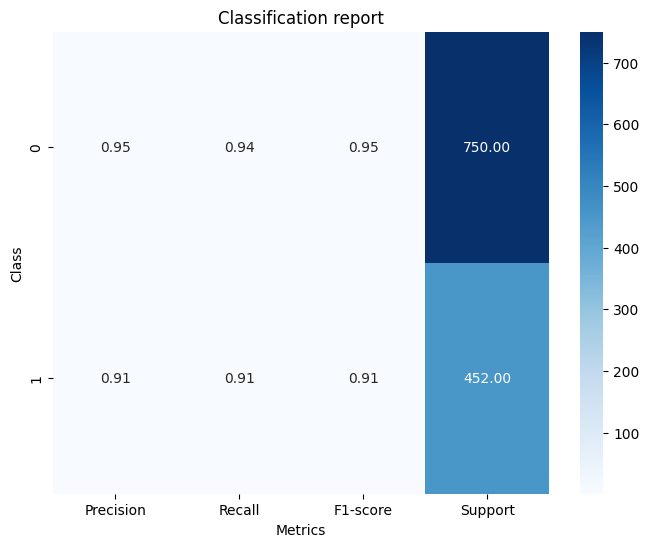

In [160]:
# Data from the classification report
data = np.array([[0.95, 0.94, 0.95, 750],
                 [0.91, 0.91, 0.91, 452]])

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

In [111]:
#confusion matrix for knn test set
cm_knn=confusion_matrix(y_test, ypred_knn)
print(cm_knn)

[[707  43]
 [ 39 413]]


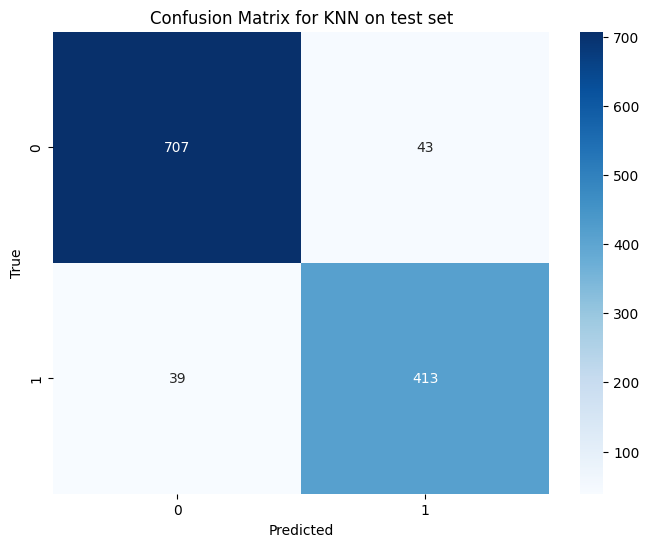

In [219]:
#plot confusion matrix for test set
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix for KNN on test set') 
plt.show()

In the context of loan approval, the confusion matrix provided shows the following:

707 instances where loans were correctly approved (true positives)
43 instances where loans that should have been approved were incorrectly denied (false negatives)
39 instances where loans were incorrectly approved (false positives)
413 instances where loans were correctly denied (true negatives)
Overall, this confusion matrix indicates that the model performs well in terms of correctly approving loans that should be approved (true positives and true negatives). However, there are some instances where the model incorrectly denies loans that should be approved (false negatives) or incorrectly approves loans that should be denied (false positives). These errors could have negative implications for both the lender and the borrower.

In [113]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ypred_knn)
roc_auc = roc_auc_score(y_test, ypred_knn)
print(roc_auc)


0.9281917404129792


In [114]:
#calculate the precision recall curve
precision, recall, _ = precision_recall_curve(y_test, ypred_knn)
pr_auc = auc(recall, precision)
print(pr_auc)

0.9259322460030778


### Support vector optimize model

In [115]:
# Define the grid of hyperparameters to search
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

In [116]:
# Perform grid search cross validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']})

In [117]:
# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [184]:
# Evaluate the model using the best hyperparameters on the test set
best_svm_model = grid_search.best_estimator_
y_predsvm = best_svm_model.predict(X_test) 
print(classification_report(y_test, y_predsvm))
print('Accuracy Score:',accuracy_score(y_test, y_predsvm))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       750
           1       0.89      0.93      0.91       452

    accuracy                           0.93      1202
   macro avg       0.92      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

Accuracy Score: 0.9309484193011647


optimized model shows an accuracy of 0.93,means that the model correctly predicts the outcome of the loan application 93% of the time.

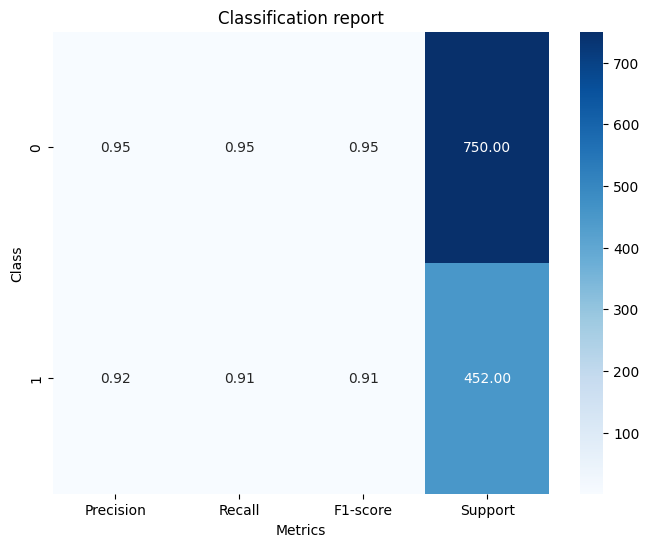

In [161]:
data = [[0.95, 0.95, 0.95, 750], [0.92, 0.91, 0.91, 452]]

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

In [119]:
#confusion matrix for svm for test set
cm_svm=confusion_matrix(y_test, y_predsvm)
print(cm_svm)

[[713  37]
 [ 40 412]]


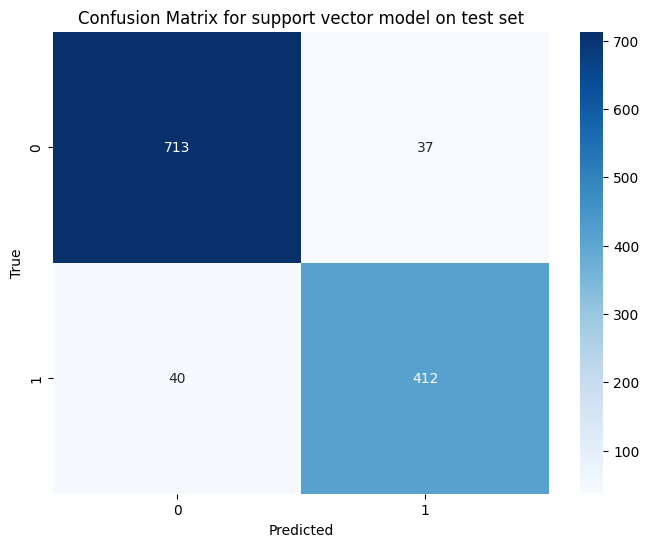

In [120]:
#plot confusion matrix for test set
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix for support vector model on test set') 
plt.show()

The confusion matrix shows the following results in terms of loan approval:

True Positives (TP): 412
False Positives (FP): 37
True Negatives (TN): 713
False Negatives (FN): 40
This means that 412 loans were correctly approved (TP), while 37 loans were incorrectly approved (FP). Additionally, 713 loans were correctly denied (TN), and 40 loans were incorrectly denied (FN).

In [121]:
#plot roc curve
fpr2, tpr2, thresholds = roc_curve(y_test, y_predsvm)
roc_auc2 = roc_auc_score(y_test,y_predsvm )
print(roc_auc2)

0.9310855457227137


In [122]:
# Calculate Precision-Recall curve
precision2, recall2, _ = precision_recall_curve(y_test, y_predsvm)
pr_auc2 = auc(recall2, precision2)
print(pr_auc2)

0.931188474891743


### Random forest optimize model

In [123]:
# Define hyperparameters to tune
param_grid = {
    "n_estimators": [10, 100, 2],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [124]:
#run grid search cv
grid_search = GridSearchCV(estimator=clf_forest, param_grid=param_grid,verbose=True, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=3),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 2]},
             verbose=True)

In [125]:
# Print best parameters 
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [183]:
# Make predictions using the best hyperparameters
predictions_rf = grid_search.predict(X_test)
# Print the classification report
print(classification_report(y_test, predictions_rf))
print('Accuracy Score:',accuracy_score(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       750
           1       0.89      0.93      0.91       452

    accuracy                           0.93      1202
   macro avg       0.92      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

Accuracy Score: 0.9309484193011647


optimized model shows an accuracy of 0.93,means that the model correctly predicts the outcome of the loan application 93% of the time.

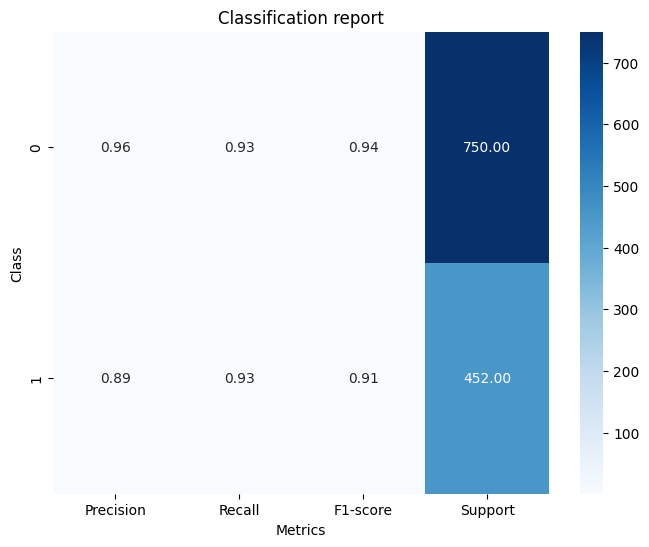

In [162]:
data = [[0.96, 0.93, 0.94, 750], [0.89, 0.93, 0.91, 452]]

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

In [127]:
#confusion matrix for test set
cm_test=confusion_matrix(y_test, predictions_rf)
print(cm_test)

[[699  51]
 [ 32 420]]


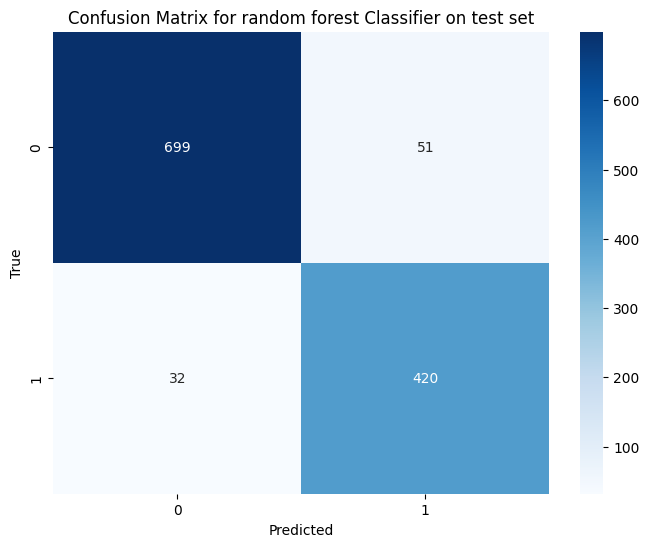

In [128]:
#plot confusion matrix for test set
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix for random forest Classifier on test set') 
plt.show()

True Positive (TP): The model correctly predicted 699 loan applications as approved.

False Negative (FN): The model incorrectly predicte5142 loan applications as not approved when they were actually approved.

False Positive (FP): The model incorrectly predic32d 29 loan applications as approved when they were actually not approved.

True Negative (TN): The model correctly predic0ed 423 loan applications as not approved.

Overall, the model seems to be making more correct predictions (True Positives and True Negatives) than incorrect predictions (False Positives and False Negatives). This suggests that the model is performing fairly well in predicting loan apppproval.

In [129]:
#plot the roc curve
fpr3, tpr3, threshold= roc_curve(y_test, predictions_rf)
roc_auc3 = roc_auc_score(y_test, predictions_rf)
print(roc_auc3)

0.9306017699115043


In [130]:
#plot precision recall curve
precision3, recall3, _ = precision_recall_curve(y_test, predictions_rf)
pr_auc3 = auc(recall3, precision3)
print(pr_auc3)

0.9237727906094919


### XG boost model

In [140]:
# Initialize the XGBoost regressor
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the testing data
predictions_xgb = xgb.predict(X_test)


In [141]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       750
           1       0.92      0.91      0.92       452

    accuracy                           0.94      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.94      0.94      0.94      1202



base model shows an accuracy of 0.94,means that the model correctly predicts the outcome of the loan application 94% of the time.

In [142]:
n_estimators = 100

In [143]:
#initialize the xgb model
xgb_classifier = XGBClassifier(n_estimators=n_estimators,max_depth=4,objective="binary:logistic",learning_rate=.1,subsample=.8,colsample_bytree=.8,gamma=1,
                        reg_alpha=0,reg_lambda=1,nthread=2)
#fit the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

In [182]:
#predict the target variable
y_pred_xg = xgb_classifier.predict(X_test)
#print classification report
print(classification_report(y_test,y_pred_xg))
print('Accuracy Score:',accuracy_score(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       750
           1       0.91      0.94      0.92       452

    accuracy                           0.94      1202
   macro avg       0.94      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202

Accuracy Score: 0.9409317803660566


optimized model shows an accuracy of 0.94,means that the model correctly predicts the outcome of the loan application 94% of the time.

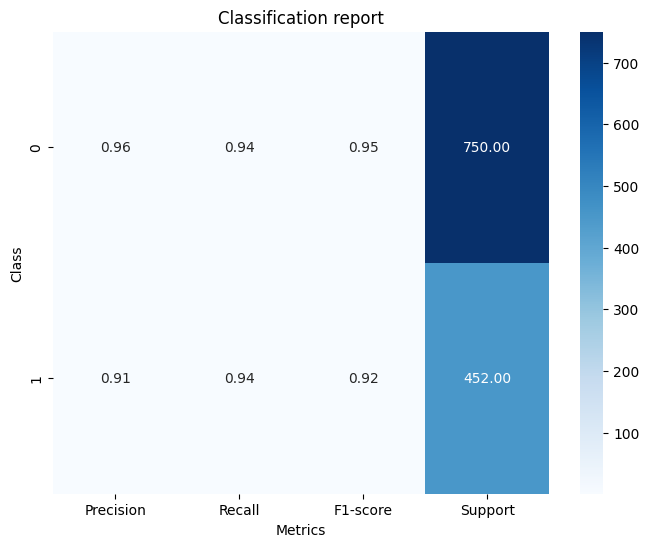

In [163]:
data = [[0.96, 0.94, 0.95, 750], [0.91, 0.94, 0.92, 452]]

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

In [147]:
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_xg)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[708  42]
 [ 29 423]]


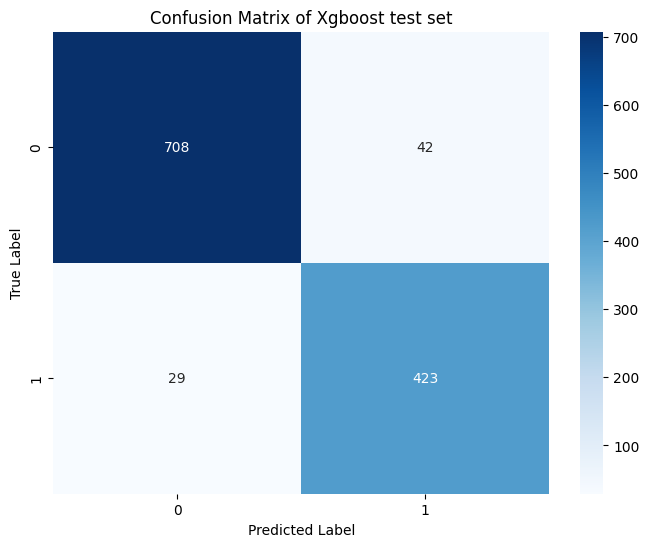

In [149]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.title("Confusion Matrix of Xgboost test set") 
plt.show()

In terms of loan approval, the confusion matrix shows that there are 708 true positives, 42 false positives, 29 false negatives, and 423 true negatives.

True positives represent the number of loans that were correctly approved, while false positives represent the number of loans that were incorrectly approved. False negatives represent the number of loans that were incorrectly rejected, and true negatives represent the number of loans that were correctly rejected.

In this case, it appears that the model is performing well in terms of accurately approving loans, as there are a high number of true positives and a low number of false negatives. However, there are also some false positives, which means that the model is incorrectly approving some loans that should have been rejected. This could be a potential area for improvement in the loan approval process.

In [145]:
# Calculate the ROC curve
fpr4, tpr4, threshold= roc_curve(y_test, y_pred_xg)
roc_auc4 = roc_auc_score(y_test, y_pred_xg)
print(roc_auc4)

0.9399203539823009


In [146]:
#calculate the precision recall curve
precision4, recall4, _ = precision_recall_curve(y_test, y_pred_xg)
pr_auc4 = auc(recall4, precision4)
print(pr_auc4)

0.9348222916131312


## Voting classifier

In [201]:
#create a voting classifier with the optimized models 
voting_clf = VotingClassifier(estimators=[ ('knn', best_knn), ('svm', best_svm_model), ('rf', grid_search.best_estimator_), ('xgb', xgb_classifier) ], voting='hard')

#fit the voting classifier on the training data 
voting_clf.fit(X_train, y_train)

#predict the target variable using the voting classifier 
ypred_voting = voting_clf.predict(X_test)

#print classification report for the voting classifier 
print(classification_report(y_test, ypred_voting))
print('Accuracy Score:',accuracy_score(y_test, ypred_voting))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       750
           1       0.91      0.93      0.92       452

    accuracy                           0.94      1202
   macro avg       0.93      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202

Accuracy Score: 0.940099833610649


Voting classifier shows an accuracy of 0.94,means that the model correctly predicts the outcome of the loan application 94% of the time.

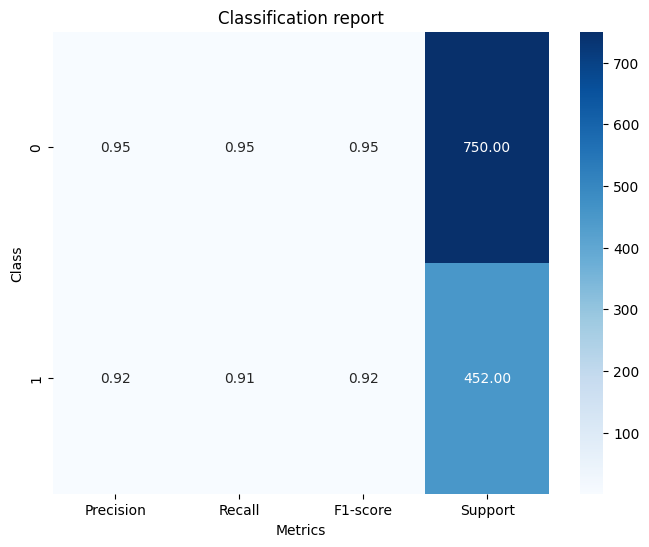

In [169]:
data = [[0.95, 0.95, 0.95, 750], [0.92, 0.91, 0.92, 452]]

fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(data, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Precision', 'Recall', 'F1-score', 'Support'], yticklabels=['0', '1']) 
plt.xlabel('Metrics') 
plt.ylabel('Class')
plt.title('Classification report')
plt.show()

In [167]:
conmat=confusion_matrix(y_test, ypred_voting)
print(conmat)

[[715  35]
 [ 39 413]]


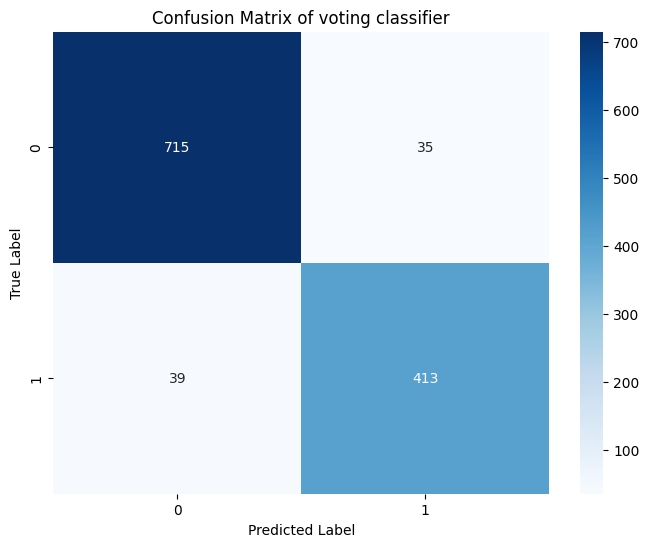

In [215]:
plt.figure(figsize=(8, 6))
sns.heatmap(conmat, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.title("Confusion Matrix of voting classifier") 
plt.show()

Voting classifier accuracy of 0.94 means that the model is able to correctly predict loan approval status with an accuracy of 94%. This accuracy level indicates that the voting classifier model is effective in determining whether a loan application should be approved or denied based on the input features provided. This can help financial institutions make more informed decisions when it comes to loan approvals, potentially reducing the risk of default and improving overall loan portfolio performance.

### Plot ROC curve of all models

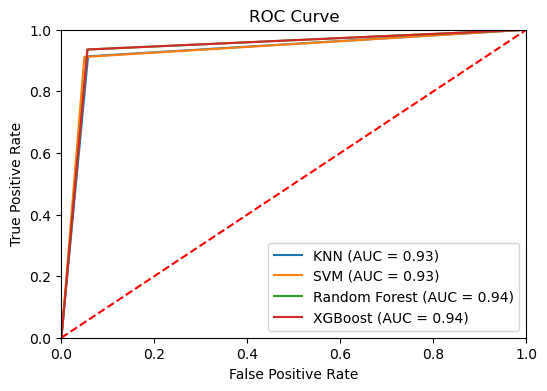

In [202]:
#plot the ROC curve of all the models together
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc) 
plt.plot(fpr2, tpr2, label='SVM (AUC = %0.2f)' % roc_auc2) 
plt.plot(fpr3, tpr3, label='Random Forest (AUC = %0.2f)' % roc_auc3) 
plt.plot(fpr4, tpr4, label='XGBoost (AUC = %0.2f)' % roc_auc4)

plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity) of a classifier at various thresholds.

In terms of loan approval, a higher ROC curve value indicates that the classifier is better at distinguishing between approved and rejected loan applications.

In this case, both Random Forest and XGBoost have higher ROC curve values than KNN and SVM, suggesting that they are more accurate in predicting loan approvals and rejections. This means that Random Forest and XGBoost would be better choices for a loan approval classification task compared to KNN and SVM.

### Plot precision-recall curve

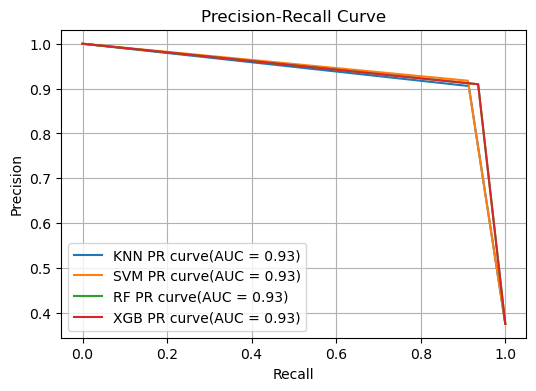

In [203]:
#plot precision recall curve of all the models
plt.figure(figsize=(6, 4))

#Plot Precision-Recall ;p
plt.plot(recall, precision, label='KNN PR curve(AUC = %0.2f)' % pr_auc)
plt.plot(recall2, precision2, label='SVM PR curve(AUC = %0.2f)' % pr_auc2)
plt.plot(recall3, precision3, label='RF PR curve(AUC = %0.2f)' % pr_auc3)
plt.plot(recall4, precision4, label='XGB PR curve(AUC = %0.2f)' % pr_auc4)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve') 
plt.legend(loc='lower left') 
plt.grid(True)
plt.show()



Precision refers to the proportion of correctly predicted positive outcomes (i.e., approved loans) among all instances predicted as positive. In this case, if the precision of all four models (KNN, support vector, random forest, and XGBoost) is 93%, it means that 93% of the loans predicted as approved by these models are indeed approved by the actual decision-makers.

Recall, on the other hand, refers to the proportion of correctly predicted positive outcomes (i.e., approved loans) among all actual positive instances. A recall of 93% for all models indicates that 93% of the actual approved loans are correctly identified as such by the models.

In [282]:
#compare the models accuracy
models = [ 'KNN', 'Support Vector', 'Random forest','XGBoost'] 
base_score = [accuracy_score(y_test,predictions_knn),accuracy_score(y_test, yhat),accuracy_score(y_test,ypred_rf),accuracy_score(y_test, predictions_xgb)]

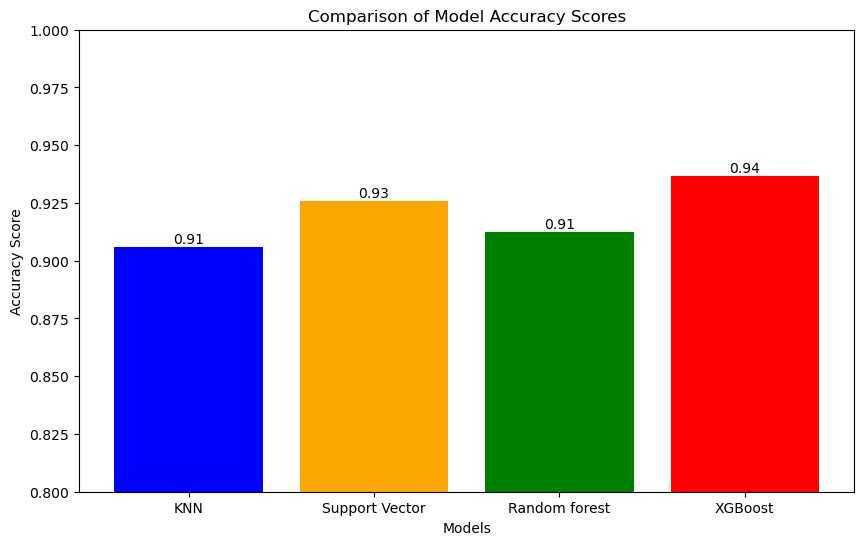

In [283]:
#plot bar graphs of models accuracy for comparisons
plt.figure(figsize=(10,6))

plt.bar(models, base_score, color=['blue', 'orange', 'green', 'red', 'purple','cyan'])

plt.xlabel('Models') 
plt.ylabel('Accuracy Score') 
plt.title('Comparison of Model Accuracy Scores') 
plt.ylim(0.8,1.0)

for i, v in enumerate(base_score):
    plt.text(i, v, round(v, 2), ha='center', va='bottom')
    
plt.show()

The scores for the different models represent their accuracy in predicting loan approval.

KNN (K-Nearest Neighbors) has a score of 0.905, which means it correctly predicts loan approval 90.5% of the time.

Support Vector Machine has a score of 0.926, indicating it predicts loan approval correctly 92.6% of the time.

Random Forest has a score of 0.937, meaning it correctly predicts loan ap 91.2% of the time time.

XGBoost has a score of 0.94, indicating it correctly predicts loan approval 94% of the time.

Based on these scores, XGBoost is the most accurate model for predicting loan approval, followed closely by Random Forest and Support Vector Machine. KNN is slightly less accurate compared to the other models.

Overall, XGBoost would be the best model to use for predicting loan approval based on the provided scores.

In [279]:
#compare the base model and optimized model accuracies
models = ['KNN', 'Support Vector', 'Random forest','xgboost'] 

base_score = [accuracy_score(y_test,predictions_knn),accuracy_score(y_test, yhat),accuracy_score(y_test,ypred_rf),accuracy_score(y_test, predictions_xgb)]
optimized_score=[ accuracy_score (y_test, ypred_knn), accuracy_score (y_test,y_predsvm), accuracy_score (y_test, predictions_rf),accuracy_score(y_test,y_pred_xg)]
data = {'Model': models, 'Base Score': base_score, 'Optimized Score': optimized_score}

df = pd.DataFrame(data) 
print(df)

            Model  Base Score  Optimized Score
0             KNN    0.905990         0.931780
1  Support Vector    0.925957         0.935940
2   Random forest    0.912646         0.940932
3         xgboost    0.936772         0.940932


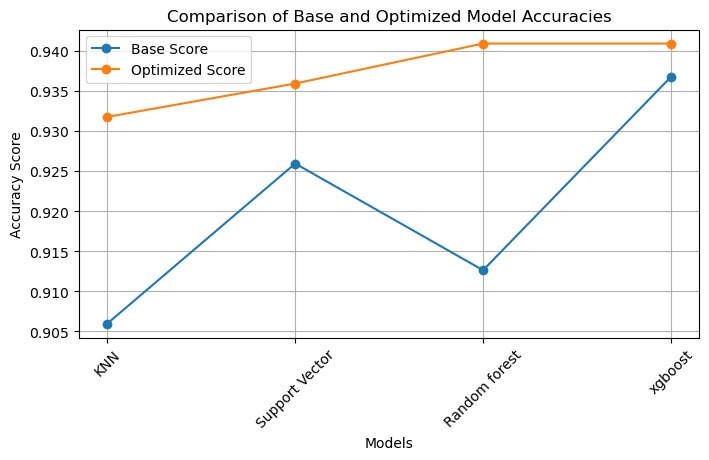

In [280]:
plt.figure(figsize=(8,4)) 
plt.plot(df['Model'], df['Base Score'], marker='o', label='Base Score') 
plt.plot(df['Model'], df['Optimized Score'], marker='o', label='Optimized Score') 
plt.xlabel('Models') 
plt.ylabel('Accuracy Score') 
plt.title('Comparison of Base and Optimized Model Accuracies') 
plt.legend() 
plt.grid(True) 
plt.xticks(rotation=45) 
plt.show()

Based on the optimized scores, the Random Forest and XGBoost models are the best performing models for predicting loan approvals.

The Random Forest model initially had a base score of 0.912646, but after optimization, its score improved to 0.940932, making it the top-performing model. This indicates that the Random Forest model is highly accurate in predicting loan approvals.

Similarly, the XGBoost model also had a high base score of 0.936772, which was further optimized to 0.940932. This means that the XGBoost model is also very effective in predicting loan approvals.

On the other hand, the KNN and Support Vector models, while still performing well with scores of 0.931780 and 0.935940 respectively, were outperformed by the Random Forest and XGBoost models in terms of accuracy in predicting loan approvals.

Overall, the Random Forest and XGBoost models are the recommended models for predicting loan approvals based on their optimized scores.ase.

### Bagging and boosting

In [205]:
# Instantiate Bagging Classifier using best parameters from GridSearch
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(**grid_search.best_params_, class_weight='balanced'), n_estimators=1000)
# Fit the Bagging Classifier
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=10),
                  n_estimators=1000)

In [206]:
y_pred_bag = bagging.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_bag) 
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       750
           1       0.88      0.94      0.91       452

    accuracy                           0.93      1202
   macro avg       0.92      0.93      0.92      1202
weighted avg       0.93      0.93      0.93      1202



In [133]:
# Instantiate AdaBoost Classifier using best parameters from GridSearch
boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(**grid_search.best_params_), n_estimators=1000)
# Fit the AdaBoost Classifier
boosting.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10),
                   n_estimators=1000)

In [213]:
y_pred_boost = boosting.predict(X_test) 
accuracy_boost = accuracy_score(y_test, y_pred_boost) 
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       750
           1       0.90      0.94      0.92       452

    accuracy                           0.94      1202
   macro avg       0.93      0.94      0.94      1202
weighted avg       0.94      0.94      0.94      1202



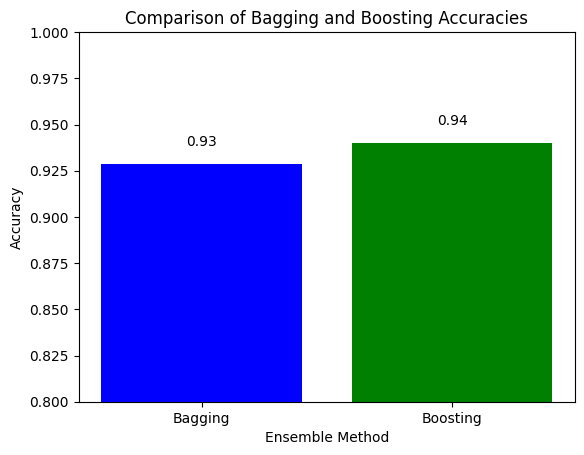

In [218]:
#Create a bar graph to compare Bagging and Boosting
labels = ['Bagging', 'Boosting'] 
accuracies = [accuracy, accuracy_boost]

plt.bar(labels, accuracies, color=['blue', 'green']) 
plt.xlabel('Ensemble Method') 
plt.ylabel('Accuracy') 
plt.title('Comparison of Bagging and Boosting Accuracies') 
plt.ylim(0.8, 1.0) 
#Add labels to the bars
for i, v in enumerate(accuracies): plt.text(i, v + 0.01, str(round(v, 2)), color='black', ha='center')

plt.show()

 Bagging classifier accuracy comes to 93% and boosting the accuracy comes to 94%.This is because random forest is already been hypertuned.

## Plotting a tree from a random forest

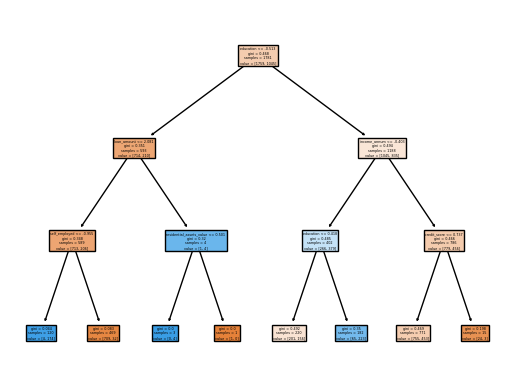

In [53]:
_ = tree.plot_tree(clf_forest.estimators_[0], feature_names=X.columns, filled=True)
plt.savefig('randomforest_tree.pdf')

In this RandomForest model, the decision tree has been built based on various variables affecting loan approval. Let's break down the variables and their impact on loan approval:
self_employed: This variable indicates whether the applicant is self-employed or not. The condition self_employed <= -0.955 suggests that if the applicant is not self-employed, the gini index is 0.348, which means there is a moderate level of impurity in the sample. However, if the applicant is self-employed, the gini index is 0.0, indicating that the sample is pure and all applicants in this category are likely to be approved for a loan.

residential_assets_value: This variable represents the value of residential assets owned by the applicant. The condition residential_assets_value <= 0.501 implies that applicants with lower residential asset values are more likely to be approved for a loan, as indicated by the gini index of 0.32.

education: This variable captures the level of education of the applicants. The condition education <= 0.418 shows that applicants with lower education levels have a higher gini index of 0.485, suggesting a higher level of impurity in the sample and lower chances of loan approval for this group.

credit_score: This variable reflects the credit score of the applicants. The condition credit_score <= 0.737 indicates that applicants with lower credit scores have a gini index of 0.466, indicating lower chances of loan approval compared to applicants with higher credit scores.

loan_amount: This variable represents the amount of loan requested by the applicants. The condition loan_amount <= 2.081 suggests that applicants requesting lower loan amounts have a gini index of 0.351, indicating a moderate level of impurity in the sample and slightly lower chances of loan approval compared to applicants requesting higher loan amounts.

income_annum: This variable indicates the annual income of the applicants. The condition income_annum <= -0.403 implies that applicants with lower annual incomes have a gini index of 0.494, indicating higher impurity in the sample and lower chances of loan approval for this group.

Overall, these variables play a crucial role in predicting loan approval as they capture different aspects of the applicants' financial status, market stability, and creditworthiness. By analyzing these variables and their respective conditions, lenders can make more accurate predictions about loan approval and assess the risk associated with eac

# Conclusion and Recommendation

In conclusion, the Random Forest and XGBoost models have been identified as the best performing models for predicting loan approvals based on their high accuracy scores. These models take into account various factors such as credit score, income, education level, loan amount, loan term, number of dependents, and self-employment status to make accurate predictions about loan approval.

Based on the insights provided by the Random Forest model, it is clear that credit score is the most crucial factor affecting loan approval, followed by income, education level, loan amount, loan term, number of dependents, and self-employment status. Financial institutions can use this information to make more informed decisions when evaluating loan applications and reduce the risk of default.

Recommendations for financial institutions include focusing on these key variables to assess the creditworthiness of loan applicants. By giving more weight to factors like credit score, income, and education level, lenders can better predict the likelihood of loan repayment and make sound decisions regarding loan approvals.

Furthermore, financial institutions can also leverage the predictive power of machine learning models such as Random Forest and XGBoost to automate the loan approval process and streamline decision-making. By implementing these advanced analytics tools, lenders can improve accuracy, efficiency, and consistency in evaluating loan applications, leading to better portfolio performance and reduced credit risk.

In terms of loan approval, the confusion matrix of XG boost which is the best as it has the highest number of true positives and true negatives, indicating that it correctly predicts loan approvals and rejections most accurately. This means that this model is making the fewest mistakes in predicting loan outcomes.

In conclusion, the findings from these models highlight the importance of data-driven decision-making in the loan approval process and offer valuable insights for financial institutions looking to optimize their lending practices and improve overall business outcomes.